In [2]:
ls data

1. outcome_total.xlsx                   9. offline_total.xlsx
2. outcome_category_total.xlsx          Add_people_total.xlsx
3. market_total.xlsx                    Add_search_total.xlsx
4. search_total.xlsx                    Add_tchannel_total.xlsx
5. people_total.xlsx                    Add_time_total.xlsx
6. marry_total.xlsx                     coffee_temple-20230725T021529Z-001.zip
7. region_total.xlsx                    raw_data/
8. delivery_total.xlsx


In [207]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from os.path import join
import matplotlib.pyplot as plt
import datetime as dt
import re

In [9]:
path = join(os.getcwd(), "data")

# 커피템플_상세_데이터(오프라인 데이터)

In [ ]:
offline_df = pd.read_excel(join(path, "9. offline_total.xlsx"))

## 결측치

In [17]:
offline_df.isna().sum().sum()

0

In [21]:
pd.options.display.max_columns = None
offline_df.head(3)

,결제일,결제시간,주문 채널,결제내역,합계,상품별 할인,결제 할인,카드 결제,현금 결제,간편 결제,기타 결제,온라인 스토어,사용 포인트,적립 포인트,사용 선불권,환불,환불 일시,배달팁(매출 포함x),카테고리,상품명,옵션,수량,상품별 단가,상품별 합계,결제메모
0,2022-02-07,19:28:53,셀러,샘플 캐모마일,-,-,-,-,-,-,-,-,-,-,-,4500,2022-02-07 19:29:37,-,에스프레소,샘플 캐모마일,-,1,4500,-,-
1,2022-02-10,10:03:28,셀러,(H) 니카라과 COE#1 외 2건,32500,-,-,32500,-,-,-,-,-,-,-,-,-,-,핸드드립,(I) 콜롬비아 로꼬 소르베,-,1,10500,10500,-
2,2022-02-10,10:03:28,셀러,(H) 니카라과 COE#1 외 2건,32500,-,-,32500,-,-,-,-,-,-,-,-,-,-,핸드드립,(H) 니카라과 COE#1,-,1,12000,12000,-


## data 타입
* 합계 , 카드 결제, 환불 column은 int 로 변환 필요 (현재 빈칸의 경우 "-" 기입 처리 object)
* 결제일 , 결제시간 , 환불 일시 datatime or timestamp 로 변환 (변환 필요시)

In [18]:
offline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145010 entries, 0 to 145009
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   결제일          145010 non-null  object
 1   결제시간         145010 non-null  object
 2   주문 채널        145010 non-null  object
 3   결제내역         145010 non-null  object
 4   합계           145010 non-null  object
 5   상품별 할인       145010 non-null  object
 6   결제 할인        145010 non-null  object
 7   카드 결제        145010 non-null  object
 8   현금 결제        145010 non-null  object
 9   간편 결제        145010 non-null  object
 10  기타 결제        145010 non-null  object
 11  온라인 스토어      145010 non-null  object
 12  사용 포인트       145010 non-null  object
 13  적립 포인트       145010 non-null  object
 14  사용 선불권       145010 non-null  object
 15  환불           145010 non-null  object
 16  환불 일시        145010 non-null  object
 17  배달팁(매출 포함x)  145010 non-null  object
 18  카테고리         145010 non-null  object
 19  상품

In [23]:
offline_df

,결제일,결제시간,주문 채널,결제내역,합계,상품별 할인,결제 할인,카드 결제,현금 결제,간편 결제,기타 결제,온라인 스토어,사용 포인트,적립 포인트,사용 선불권,환불,환불 일시,배달팁(매출 포함x),카테고리,상품명,옵션,수량,상품별 단가,상품별 합계,결제메모
0,2022-02-07,19:28:53,셀러,샘플 캐모마일,-,-,-,-,-,-,-,-,-,-,-,4500,2022-02-07 19:29:37,-,에스프레소,샘플 캐모마일,-,1,4500,-,-
1,2022-02-10,10:03:28,셀러,(H) 니카라과 COE#1 외 2건,32500,-,-,32500,-,-,-,-,-,-,-,-,-,-,핸드드립,(I) 콜롬비아 로꼬 소르베,-,1,10500,10500,-
2,2022-02-10,10:03:28,셀러,(H) 니카라과 COE#1 외 2건,32500,-,-,32500,-,-,-,-,-,-,-,-,-,-,핸드드립,(H) 니카라과 COE#1,-,1,12000,12000,-
3,2022-02-10,10:03:28,셀러,(H) 니카라과 COE#1 외 2건,32500,-,-,32500,-,-,-,-,-,-,-,-,-,-,핸드드립,(H) 과테 레드 파카마라,-,1,10000,10000,-
4,2022-02-10,10:13:57,셀러,아이스 텐저린 라떼 외 2건,20000,-,-,20000,-,-,-,-,-,-,-,-,-,-,시그니처,아이스 텐저린 라떼,-,1,7000,7000,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145005,2023-05-31,17:21:24,셀러,드립백 쥬시 외 2건,36100,-,-,36100,-,-,-,-,-,-,-,-,-,-,드립백/캡슐,드립백 클래식,-,1,18000,18000,-
145006,2023-05-31,17:21:24,셀러,드립백 쥬시 외 2건,36100,-,-,36100,-,-,-,-,-,-,-,-,-,-,포장,종이백,-,1,100,100,-
145007,2023-05-31,17:22:16,셀러,(KCW) 기념 뱃지,6000,-,-,6000,-,-,-,-,-,-,-,-,-,-,MD,(KCW) 기념 뱃지,-,1,6000,6000,-
145008,2023-05-31,17:24:37,셀러,(I) 오미자 에이드 외 1건,14000,-,-,14000,-,-,-,-,-,-,-,-,-,-,비버리지,(I) 오미자 에이드,-,1,7000,7000,-


In [37]:
def convert_to_nan(data):
    df = data.copy()
    columns = df.columns.to_list()
    for col in columns:
        df[col] = df[col].apply(lambda x: np.nan if x == "-" else x)
    
    return df

offline_df = convert_to_nan(offline_df)

In [39]:
offline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145010 entries, 0 to 145009
Data columns (total 25 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   결제일          145010 non-null  object 
 1   결제시간         145010 non-null  object 
 2   주문 채널        145010 non-null  object 
 3   결제내역         145010 non-null  object 
 4   합계           143016 non-null  float64
 5   상품별 할인       2 non-null       float64
 6   결제 할인        369 non-null     float64
 7   카드 결제        140020 non-null  float64
 8   현금 결제        2858 non-null    float64
 9   간편 결제        104 non-null     float64
 10  기타 결제        82 non-null      float64
 11  온라인 스토어      0 non-null       float64
 12  사용 포인트       0 non-null       float64
 13  적립 포인트       0 non-null       float64
 14  사용 선불권       0 non-null       float64
 15  환불           1991 non-null    float64
 16  환불 일시        1994 non-null    object 
 17  배달팁(매출 포함x)  0 non-null       float64
 18  카테고리         145010 non-

## .describe
* count 가 0인 column 들의 경우 제거
* 주문 채널 컬럼은 값이 모두 "셀러"이므로 제거

In [44]:
offline_df.head(1)

,결제일,결제시간,주문 채널,결제내역,합계,상품별 할인,결제 할인,카드 결제,현금 결제,간편 결제,기타 결제,온라인 스토어,사용 포인트,적립 포인트,사용 선불권,환불,환불 일시,배달팁(매출 포함x),카테고리,상품명,옵션,수량,상품별 단가,상품별 합계,결제메모
0,2022-02-07,19:28:53,셀러,샘플 캐모마일,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4500.0,2022-02-07 19:29:37,NaN,에스프레소,샘플 캐모마일,NaN,1,4500,NaN,NaN


In [42]:
num_columns = offline_df.select_dtypes(exclude = "object").columns.to_list()
offline_df[num_columns].describe()

# "온라인 스토어", "사용 포인트", "적립 포인트", "사용 선불권", "배달팁(매출 포함x)", "결제메모"

,합계,상품별 할인,결제 할인,카드 결제,현금 결제,간편 결제,기타 결제,온라인 스토어,사용 포인트,적립 포인트,사용 선불권,환불,배달팁(매출 포함x),수량,상품별 단가,상품별 합계,결제메모
count,143016.000000,2.0,369.000000,140020.000000,2858.000000,104.000000,82.000000,0.0,0.0,0.0,0.0,1991.000000,0.0,145010.000000,145010.000000,143016.000000,0.0
mean,22427.917170,3600.0,26802.357724,22321.277817,23578.660602,28449.038462,22950.000000,NaN,NaN,NaN,NaN,27780.411853,NaN,1.114006,7594.773471,8433.577376,NaN
std,16015.168545,0.0,24233.387948,15430.987537,18961.881445,24816.014228,12611.157611,NaN,NaN,NaN,NaN,20888.164378,NaN,0.424342,4779.003910,6342.009938,NaN
min,2.000000,3600.0,1000.000000,100.000000,2.000000,3500.000000,3300.000000,NaN,NaN,NaN,NaN,100.000000,NaN,1.000000,0.000000,0.000000,NaN
25%,13500.000000,3600.0,7200.000000,13500.000000,13000.000000,13500.000000,13500.000000,NaN,NaN,NaN,NaN,15000.000000,NaN,1.000000,6000.000000,6500.000000,NaN
50%,19000.000000,3600.0,19200.000000,19000.000000,20000.000000,19000.000000,20500.000000,NaN,NaN,NaN,NaN,21500.000000,NaN,1.000000,7000.000000,7000.000000,NaN
75%,27000.000000,3600.0,40200.000000,26725.000000,30100.000000,34875.000000,33000.000000,NaN,NaN,NaN,NaN,32500.000000,NaN,1.000000,7000.000000,8000.000000,NaN
max,420000.000000,3600.0,126000.000000,418000.000000,205000.000000,102400.000000,51200.000000,NaN,NaN,NaN,NaN,222600.000000,NaN,25.000000,104600.000000,300000.000000,NaN


In [50]:
cat_columns = offline_df.select_dtypes(include = "object").columns.to_list()
offline_df[cat_columns].describe()

# "주문 채널"

,결제일,결제시간,주문 채널,결제내역,환불 일시,카테고리,상품명,옵션
count,145010,145010,145010,145010,1994,145010,145010,36
unique,459,26782,1,3736,794,18,1230,9
top,2023-05-21,12:11:06,셀러,아이스 텐저린 라떼 외 1건,2023-05-21 12:53:13,시그니처,아이스 텐저린 라떼,Hot
freq,574,29,145010,10086,9,40431,16040,18


In [53]:
rm_columns = ["온라인 스토어", "사용 포인트", "적립 포인트", "사용 선불권", "배달팁(매출 포함x)", "결제메모", "주문 채널"]
offline_df = offline_df.drop(rm_columns, axis = 1)

In [54]:
offline_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145010 entries, 0 to 145009
Data columns (total 18 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   결제일     145010 non-null  object 
 1   결제시간    145010 non-null  object 
 2   결제내역    145010 non-null  object 
 3   합계      143016 non-null  float64
 4   상품별 할인  2 non-null       float64
 5   결제 할인   369 non-null     float64
 6   카드 결제   140020 non-null  float64
 7   현금 결제   2858 non-null    float64
 8   간편 결제   104 non-null     float64
 9   기타 결제   82 non-null      float64
 10  환불      1991 non-null    float64
 11  환불 일시   1994 non-null    object 
 12  카테고리    145010 non-null  object 
 13  상품명     145010 non-null  object 
 14  옵션      36 non-null      object 
 15  수량      145010 non-null  int64  
 16  상품별 단가  145010 non-null  int64  
 17  상품별 합계  143016 non-null  float64
dtypes: float64(9), int64(2), object(7)
memory usage: 19.9+ MB


## date, datetime, timestamp

In [55]:
offline_df.head(5)

,결제일,결제시간,결제내역,합계,상품별 할인,결제 할인,카드 결제,현금 결제,간편 결제,기타 결제,환불,환불 일시,카테고리,상품명,옵션,수량,상품별 단가,상품별 합계
0,2022-02-07,19:28:53,샘플 캐모마일,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4500.0,2022-02-07 19:29:37,에스프레소,샘플 캐모마일,NaN,1,4500,NaN
1,2022-02-10,10:03:28,(H) 니카라과 COE#1 외 2건,32500.0,NaN,NaN,32500.0,NaN,NaN,NaN,NaN,NaN,핸드드립,(I) 콜롬비아 로꼬 소르베,NaN,1,10500,10500.0
2,2022-02-10,10:03:28,(H) 니카라과 COE#1 외 2건,32500.0,NaN,NaN,32500.0,NaN,NaN,NaN,NaN,NaN,핸드드립,(H) 니카라과 COE#1,NaN,1,12000,12000.0
3,2022-02-10,10:03:28,(H) 니카라과 COE#1 외 2건,32500.0,NaN,NaN,32500.0,NaN,NaN,NaN,NaN,NaN,핸드드립,(H) 과테 레드 파카마라,NaN,1,10000,10000.0
4,2022-02-10,10:13:57,아이스 텐저린 라떼 외 2건,20000.0,NaN,NaN,20000.0,NaN,NaN,NaN,NaN,NaN,시그니처,아이스 텐저린 라떼,NaN,1,7000,7000.0


In [59]:
offline_df["결제일시"] = offline_df.loc[:, "결제일"] + " " + offline_df.loc[:, "결제시간"]

In [66]:
offline_df["결제일시"] = pd.to_datetime(offline_df["결제일시"])
offline_df

,결제일,결제시간,결제내역,합계,상품별 할인,결제 할인,카드 결제,현금 결제,간편 결제,기타 결제,환불,환불 일시,카테고리,상품명,옵션,수량,상품별 단가,상품별 합계,결제일시
0,2022-02-07,19:28:53,샘플 캐모마일,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4500.0,2022-02-07 19:29:37,에스프레소,샘플 캐모마일,NaN,1,4500,NaN,2022-02-07 19:28:53
1,2022-02-10,10:03:28,(H) 니카라과 COE#1 외 2건,32500.0,NaN,NaN,32500.0,NaN,NaN,NaN,NaN,NaN,핸드드립,(I) 콜롬비아 로꼬 소르베,NaN,1,10500,10500.0,2022-02-10 10:03:28
2,2022-02-10,10:03:28,(H) 니카라과 COE#1 외 2건,32500.0,NaN,NaN,32500.0,NaN,NaN,NaN,NaN,NaN,핸드드립,(H) 니카라과 COE#1,NaN,1,12000,12000.0,2022-02-10 10:03:28
3,2022-02-10,10:03:28,(H) 니카라과 COE#1 외 2건,32500.0,NaN,NaN,32500.0,NaN,NaN,NaN,NaN,NaN,핸드드립,(H) 과테 레드 파카마라,NaN,1,10000,10000.0,2022-02-10 10:03:28
4,2022-02-10,10:13:57,아이스 텐저린 라떼 외 2건,20000.0,NaN,NaN,20000.0,NaN,NaN,NaN,NaN,NaN,시그니처,아이스 텐저린 라떼,NaN,1,7000,7000.0,2022-02-10 10:13:57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145005,2023-05-31,17:21:24,드립백 쥬시 외 2건,36100.0,NaN,NaN,36100.0,NaN,NaN,NaN,NaN,NaN,드립백/캡슐,드립백 클래식,NaN,1,18000,18000.0,2023-05-31 17:21:24
145006,2023-05-31,17:21:24,드립백 쥬시 외 2건,36100.0,NaN,NaN,36100.0,NaN,NaN,NaN,NaN,NaN,포장,종이백,NaN,1,100,100.0,2023-05-31 17:21:24
145007,2023-05-31,17:22:16,(KCW) 기념 뱃지,6000.0,NaN,NaN,6000.0,NaN,NaN,NaN,NaN,NaN,MD,(KCW) 기념 뱃지,NaN,1,6000,6000.0,2023-05-31 17:22:16
145008,2023-05-31,17:24:37,(I) 오미자 에이드 외 1건,14000.0,NaN,NaN,14000.0,NaN,NaN,NaN,NaN,NaN,비버리지,(I) 오미자 에이드,NaN,1,7000,7000.0,2023-05-31 17:24:37


In [384]:
offline_df["year"] = offline_df["결제일시"].apply(lambda x: x.year)
offline_df["month"] = offline_df["결제일시"].apply(lambda x: x.month)
offline_df["day"] = offline_df["결제일시"].apply(lambda x: x.day)
offline_df["hour"] = offline_df["결제일시"].apply(lambda x: x.hour)
offline_df["day_name"] = offline_df["결제일시"].apply(lambda x: x.day_name())
offline_df["year_month"] = pd.to_datetime(offline_df["결제일"]).dt.strftime("%Y-%m")
# offline_df

# 오프라인 - 온라인 원두
# 오프라인(유튜브, 이벤트, 게스트 바리스타) 원두 판매 증감이 있는지, 온라인에도 증감이 있는지
# purchase limitation (금액적인 부분)

,결제일,결제시간,결제내역,합계,상품별 할인,결제 할인,카드 결제,현금 결제,간편 결제,기타 결제,환불,환불 일시,카테고리,상품명,옵션,수량,상품별 단가,상품별 합계,결제일시,year,month,day,hour,year_month
0,2022-02-07,19:28:53,샘플 캐모마일,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4500.0,2022-02-07 19:29:37,에스프레소,샘플 캐모마일,NaN,1,4500,NaN,2022-02-07 19:28:53,2022,2,7,Monday,2022-02
1,2022-02-10,10:03:28,(H) 니카라과 COE#1 외 2건,32500.0,NaN,NaN,32500.0,NaN,NaN,NaN,NaN,NaN,핸드드립,(I) 콜롬비아 로꼬 소르베,NaN,1,10500,10500.0,2022-02-10 10:03:28,2022,2,10,Thursday,2022-02
2,2022-02-10,10:03:28,(H) 니카라과 COE#1 외 2건,32500.0,NaN,NaN,32500.0,NaN,NaN,NaN,NaN,NaN,핸드드립,(H) 니카라과 COE#1,NaN,1,12000,12000.0,2022-02-10 10:03:28,2022,2,10,Thursday,2022-02
3,2022-02-10,10:03:28,(H) 니카라과 COE#1 외 2건,32500.0,NaN,NaN,32500.0,NaN,NaN,NaN,NaN,NaN,핸드드립,(H) 과테 레드 파카마라,NaN,1,10000,10000.0,2022-02-10 10:03:28,2022,2,10,Thursday,2022-02
4,2022-02-10,10:13:57,아이스 텐저린 라떼 외 2건,20000.0,NaN,NaN,20000.0,NaN,NaN,NaN,NaN,NaN,시그니처,아이스 텐저린 라떼,NaN,1,7000,7000.0,2022-02-10 10:13:57,2022,2,10,Thursday,2022-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145005,2023-05-31,17:21:24,드립백 쥬시 외 2건,36100.0,NaN,NaN,36100.0,NaN,NaN,NaN,NaN,NaN,드립백/캡슐,드립백 클래식,NaN,1,18000,18000.0,2023-05-31 17:21:24,2023,5,31,Wednesday,2023-05
145006,2023-05-31,17:21:24,드립백 쥬시 외 2건,36100.0,NaN,NaN,36100.0,NaN,NaN,NaN,NaN,NaN,포장,종이백,NaN,1,100,100.0,2023-05-31 17:21:24,2023,5,31,Wednesday,2023-05
145007,2023-05-31,17:22:16,(KCW) 기념 뱃지,6000.0,NaN,NaN,6000.0,NaN,NaN,NaN,NaN,NaN,MD,(KCW) 기념 뱃지,NaN,1,6000,6000.0,2023-05-31 17:22:16,2023,5,31,Wednesday,2023-05
145008,2023-05-31,17:24:37,(I) 오미자 에이드 외 1건,14000.0,NaN,NaN,14000.0,NaN,NaN,NaN,NaN,NaN,비버리지,(I) 오미자 에이드,NaN,1,7000,7000.0,2023-05-31 17:24:37,2023,5,31,Wednesday,2023-05


# 전처리 및 실험 단계

In [90]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

<AxesSubplot:xlabel='결제일시', ylabel='상품별 단가'>

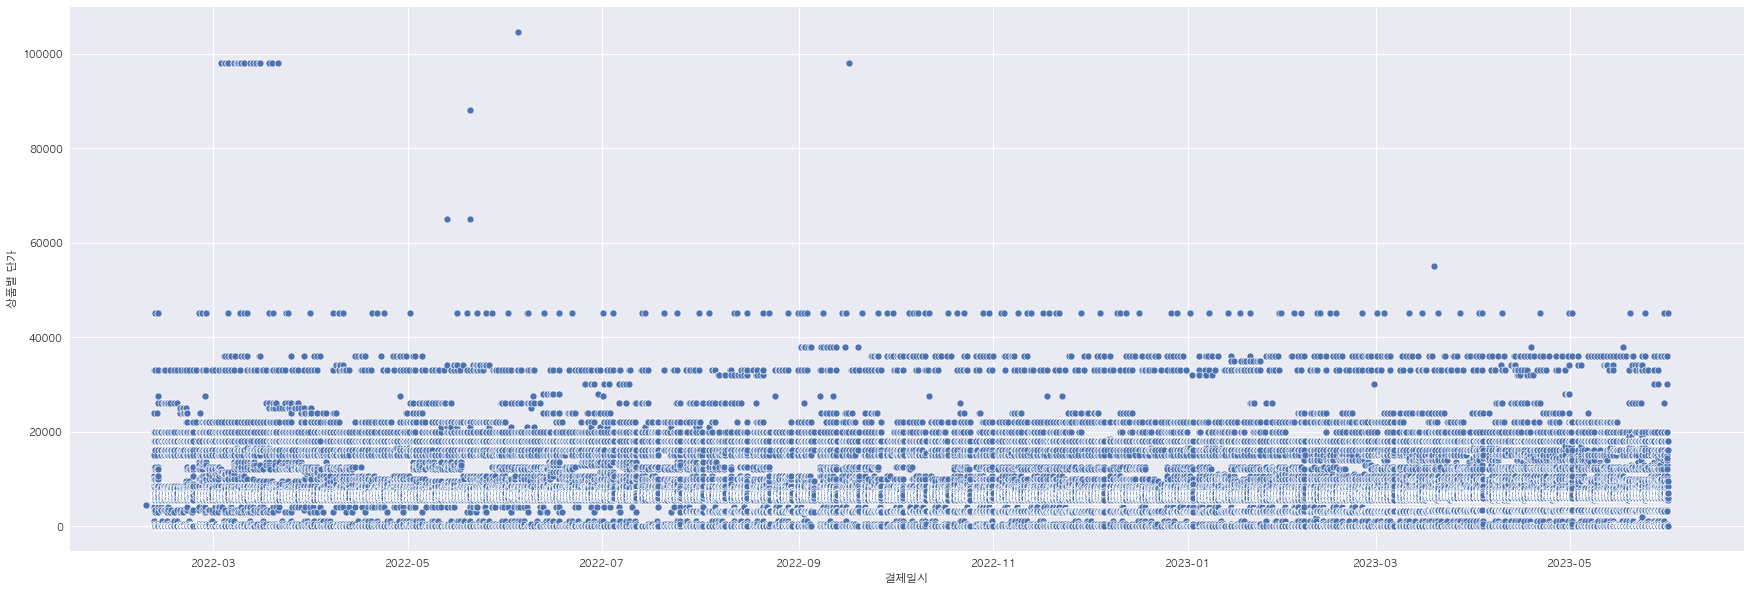

In [94]:
plt.style.use("seaborn")
font_family = get_font_family()
# 마이너스폰트 설정
plt.rc("axes", unicode_minus = False)
plt.rc("font", family = font_family)


plt.figure(figsize = (30,10))
sns.scatterplot(data= offline_df, x = "결제일시", y = "상품별 단가")

<AxesSubplot:xlabel='결제일', ylabel='상품별 합계'>

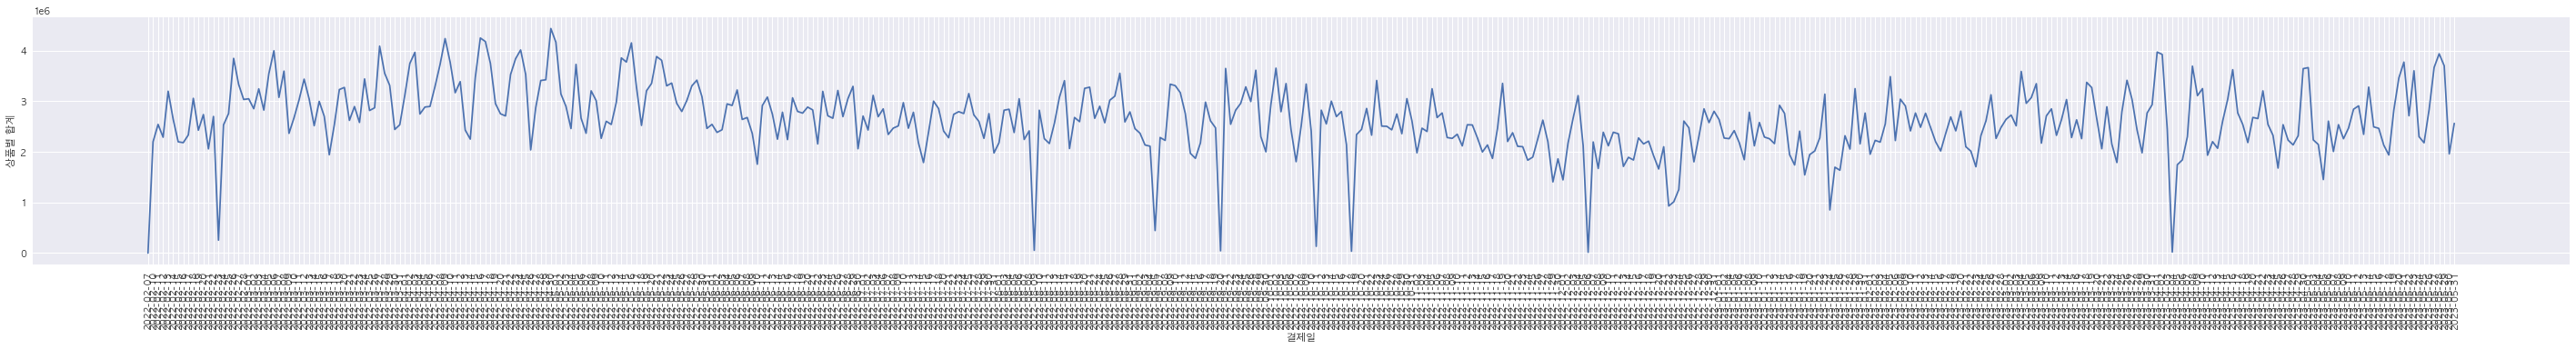

In [317]:
g = offline_df.groupby("결제일")["상품별 합계"].sum().reset_index()
plt.figure(figsize = (50,5))
plt.xticks(rotation = 90)
sns.lineplot(data = g, x = "결제일", y = "상품별 합계")

<AxesSubplot:xlabel='year_month', ylabel='상품별 합계'>

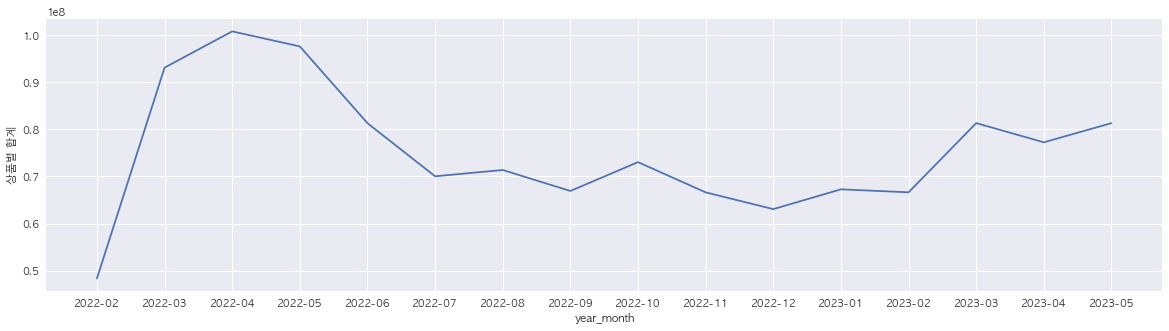

In [148]:
g = offline_df.groupby(["year_month"]).sum().reset_index()
plt.figure(figsize = (20,5))
sns.lineplot(data = g, x = "year_month", y = "상품별 합계")

<AxesSubplot:xlabel='year_month', ylabel='수량'>

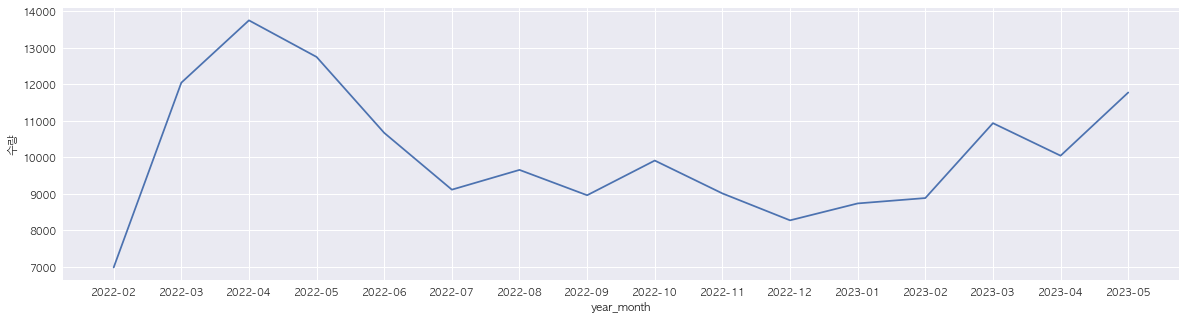

In [190]:
g = offline_df.groupby(["year_month"]).sum().reset_index()
plt.figure(figsize = (20,5))
sns.lineplot(data = g, x = "year_month", y = "수량")

In [155]:
g = offline_df.groupby(["year_month"]).sum().reset_index()
jeju_population_1 = pd.read_csv("./data/제주특별자치도_방문자수.csv", encoding= "cp949")
jeju_population_2 = pd.read_csv("./data/제주특별자치도_제주시_방문자수.csv", encoding= "cp949")

jeju_population_1 = jeju_population_1.rename(columns={"방문자 수":"제주 방문 인원"})
jeju_population_2 = jeju_population_2.rename(columns={"방문자 수":"제주시 방문 인원"})

In [319]:
# tmp = offline_df.loc[offline_df["상품명"].str.contains("디카프"), "상품명"].copy()
# tmp.value_counts()

tmp = offline_df.loc[offline_df["카테고리"] == "Basic", "상품명"].copy()
tmp.value_counts()




아메리카노 _ 클래식        3559
아메리카노 _ 쥬시         1377
카페라떼 _ 클래식         1287
(H) 플랫화이트 _ 클래식     927
아메리카노_싱글            562
카페라떼 _ 쥬시           507
클래식_아메리카노           503
아메리카노 _ 디카프         439
카푸치노 _ 클래식          432
(H) 플랫화이트 _ 쥬시      402
클래식_카페라떼            325
카페라떼 _ 디카프          294
오틀리                 293
카페라떼 _ 클래식          293
바닐라 라떼 _ 클래식        213
연하게                 211
쥬시_아메리카노            202
(H) 플랫화이트 _ 디카프     184
클래식_플랫화이트           156
카페라떼_싱글             151
싱글_아메리카노            136
(H)플랫화이트_싱글         107
클래식_카푸치노            107
카푸치노 _ 쥬시           102
카푸치노 _ 디카프           87
쥬시_카페라떼              84
🟢 야외                 76
쥬시_플랫화이트             70
시럽                   64
디카프_아메리카노            63
디카프_카페라떼             48
싱글_카페라떼              47
클래식_바닐라라떼            46
바닐라시럽                46
싱글_플랫화이트             44
1샷 추가                35
🟤 포장                 34
바닐라 라떼 _ 디카프         34
카푸치노_싱글              33
바닐라라떼 _ 쥬시           29
싱글_카푸치노              28
플랫화이트 _ 클래식     

In [380]:
# tmp.apply(lambda x : re.sub(r"[^\0-9a-zA-Z가-힣\_]?","", x)).value_counts()

# new_str = re.sub(r"[^\uAC00-\uD7A30-9a-zA-Z\s]", "", str)


# tmp.apply(lambda x : re.sub(r"\s\_\s|\s\s|\s|\+","_", x)).value_counts()
tmp = offline_df.copy()
pattern = r'\s*_\s*'
tmp.loc[tmp["카테고리"] == "Basic", "상품명"] = tmp.loc[tmp["카테고리"] == "Basic", "상품명"].apply(lambda x : re.sub(pattern, r'_', x))
tmp.loc[tmp["카테고리"] == "Basic", "상품명"] = tmp.loc[tmp["카테고리"] == "Basic", "상품명"].apply(lambda x : re.sub("\s", "", x))
tmp.loc[tmp["카테고리"] == "Basic", "상품명"].value_counts()

rename_dict = {"클래식_아메리카노" : "아메리카노_클래식",
               "클래식_카페라떼" : "카페라떼_클래식",
               "클래식_플랫화이트" : "플랫화이트_클래식",
               "클래식_카푸치노" : "카푸치노_클래식",
               "클래식_바닐라라떼" : "바닐라라떼_클래식",
               
               "쥬시_아메리카노" : "아메리카노_쥬시",
               "쥬시_카페라떼" : "카페라떼_쥬시",
               "쥬시_플랫화이트" : "플랫화이트_쥬시",
               "쥬시_카푸치노" : "카푸치노_쥬시",
               "쥬시_바닐라라떼" : "바닐라라떼_쥬시",

               "싱글_아메리카노" : "아메리카노_싱글",
               "싱글_카페라떼" : "카페라떼_싱글",
               "싱글_플랫화이트" : "플랫화이트_싱글",
               "싱글_카푸치노" : "카푸치노_싱글",
               "싱글_바닐라라떼" : "바닐라라떼_싱글",

               "디카프_아메리카노" : "아메리카노_디카프",
               "디카프_카페라떼" : "카페라떼_싱디카프",
               "디카프_플랫화이트" : "플랫화이트_디카프",
               "디카프_카푸치노" : "카푸치노_디카프",
               "디카프_바닐라라떼" : "바닐라라떼_디카프", 
              }

beans_lst = ["클래식_", "쥬시_", "싱글_", "디카프_"]
for bean in beans_lst:
    idx = tmp.loc[tmp["카테고리"] == "Basic", "상품명"][tmp.loc[tmp["카테고리"] == "Basic", "상품명"].str.contains(bean)].index
    tmp.loc[idx,"상품명"] = tmp.loc[idx,"상품명"].map(rename_dict)

tmp.loc[tmp["카테고리"] == "Basic", "상품명"].value_counts()



아메리카노_클래식       4062
카페라떼_클래식        1905
아메리카노_쥬시        1579
(H)플랫화이트_클래식     927
아메리카노_싱글         698
카페라떼_쥬시          591
카푸치노_클래식         539
아메리카노_디카프        502
(H)플랫화이트_쥬시      402
카페라떼_디카프         294
오틀리              293
바닐라라떼_클래식        259
연하게              211
카페라떼_싱글          198
(H)플랫화이트_디카프     184
플랫화이트_클래식        182
카푸치노_쥬시          123
(H)플랫화이트_싱글      107
카푸치노_디카프         103
플랫화이트_쥬시          79
🟢야외               76
시럽                64
카푸치노_싱글           61
플랫화이트_싱글          57
카페라떼_싱디카프         48
바닐라시럽             46
바닐라라떼_디카프         40
1샷추가              35
🟤포장               34
바닐라라떼_쥬시          33
플랫화이트_디카프         29
오트사이드             20
물적게               13
2샷추가              11
바닐라라떼_싱글           9
캐리어                4
Name: 상품명, dtype: int64

## feature 별 상관관계

In [297]:
g = offline_df.groupby(["year_month"]).sum().reset_index()
jeju_population_1 = pd.read_csv("./data/제주특별자치도_방문자수.csv", encoding= "cp949")
jeju_population_2 = pd.read_csv("./data/제주특별자치도_제주시_방문자수.csv", encoding= "cp949")

jeju_population_1 = jeju_population_1.rename(columns={"방문자 수":"제주 방문 인원"})
jeju_population_2 = jeju_population_2.rename(columns={"방문자 수":"제주시 방문 인원"})
g = pd.concat([g,jeju_population_1["제주 방문 인원"][1:].reset_index(drop = True)], axis = 1)
g = pd.concat([g,jeju_population_2["제주시 방문 인원"][1:].reset_index(drop = True)], axis = 1)
g = g.drop(["year","month","day","hour"], axis = 1)
g

,year_month,합계,상품별 할인,결제 할인,카드 결제,현금 결제,간편 결제,기타 결제,환불,수량,상품별 단가,상품별 합계,제주 방문 인원,제주시 방문 인원
0,2022-02,136292200.0,0.0,256000.0,133937400.0,2098800.0,0.0,0.0,2100000.0,6987,44011500,48341300.0,5076037.0,4831029.0
1,2022-03,238486600.0,0.0,931200.0,232371300.0,5184100.0,0.0,0.0,3669800.0,12046,86498500,93120200.0,4829488.0,4692568.0
2,2022-04,254269600.0,0.0,497450.0,248894750.0,4877400.0,0.0,0.0,4737400.0,13753,91784700,100824800.0,5404632.0,5215911.0
3,2022-05,247494100.0,0.0,300600.0,239744200.0,7449300.0,0.0,0.0,3561400.0,12751,89007200,97623600.0,5386174.0,5211568.0
4,2022-06,211602100.0,0.0,1087900.0,207065200.0,3449000.0,0.0,0.0,3976300.0,10672,73752600,81317700.0,5873436.0,5497719.0
5,2022-07,186433502.0,0.0,879800.0,180643100.0,4910602.0,0.0,0.0,3255600.0,9117,64060201,70041802.0,8057212.0,7291538.0
6,2022-08,192269100.0,0.0,873580.0,187841220.0,3554300.0,0.0,0.0,3047900.0,9658,64855400,71376200.0,6523929.0,6155493.0
7,2022-09,184572800.0,0.0,476200.0,180184690.0,3911910.0,0.0,0.0,6072600.0,8964,61209500,66923300.0,5053172.0,4988408.0
8,2022-10,197741700.0,0.0,633400.0,192359500.0,4748800.0,0.0,0.0,2663400.0,9914,66830600,73047700.0,6104759.0,6001209.0
9,2022-11,174579400.0,0.0,241400.0,169115300.0,5222700.0,0.0,0.0,2497400.0,9014,61067600,66627200.0,5260455.0,5196776.0


<AxesSubplot:xlabel='year_month', ylabel='제주시 방문 인원'>

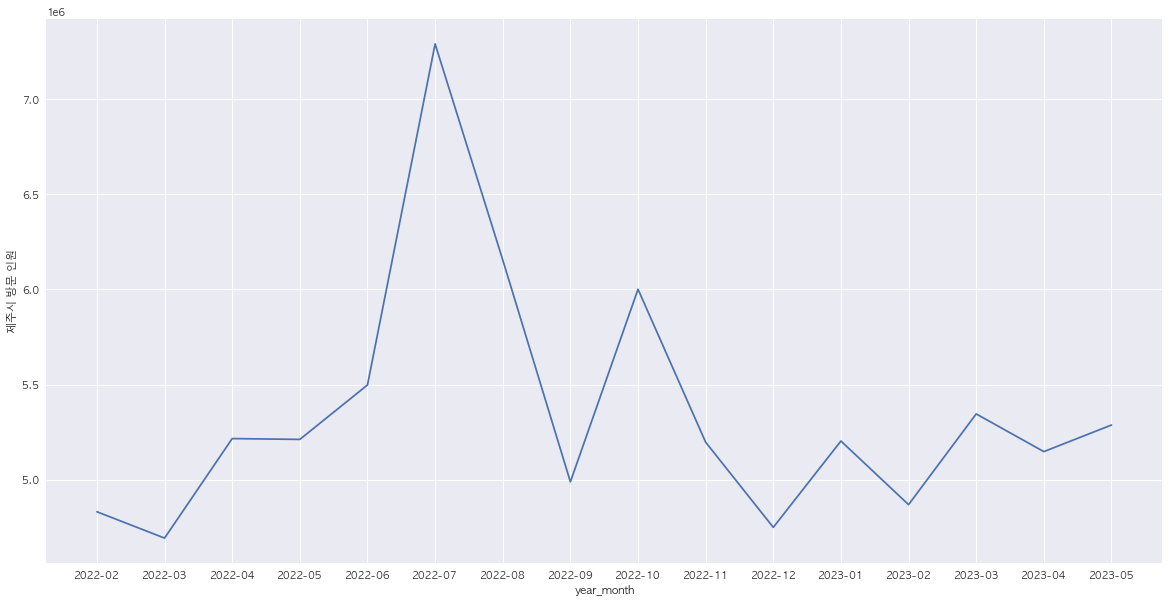

In [304]:
plt.figure(figsize = (20,10))
sns.lineplot(data= g, x = "year_month", y = "제주시 방문 인원")
# sns.lineplot(data= g, x = "year_month", y = "제주 방문 인원")
# sns.lineplot(data= g, x = "year_month", y = "상품별 합계")

<AxesSubplot:xlabel='year_month', ylabel='상품별 합계'>

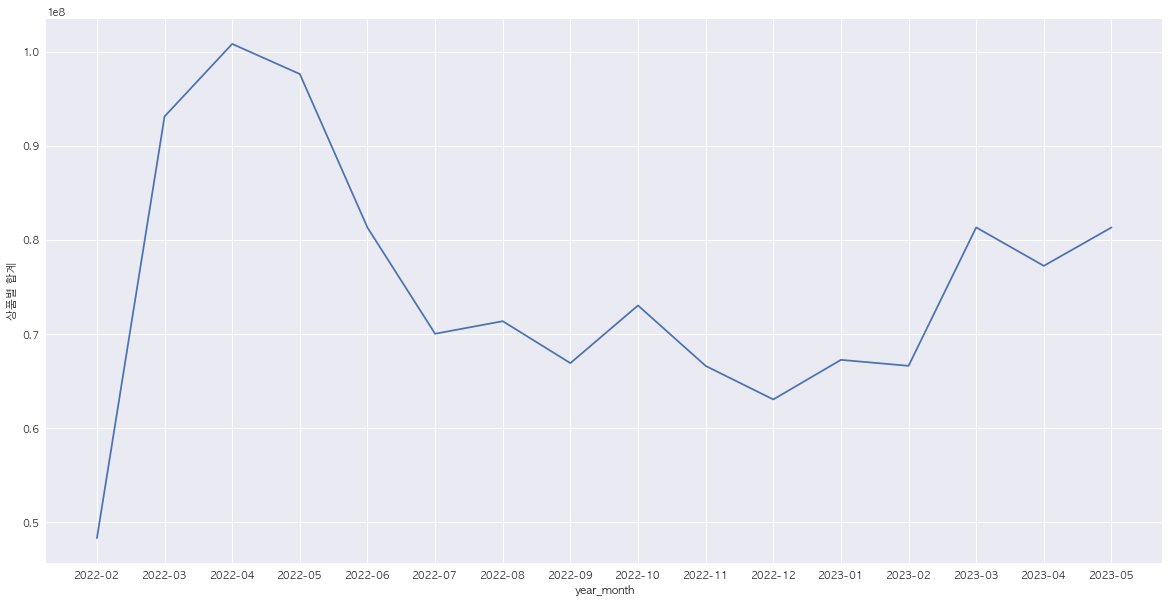

In [305]:
plt.figure(figsize = (20,10))
sns.lineplot(data= g, x = "year_month", y = "상품별 합계")

<AxesSubplot:>

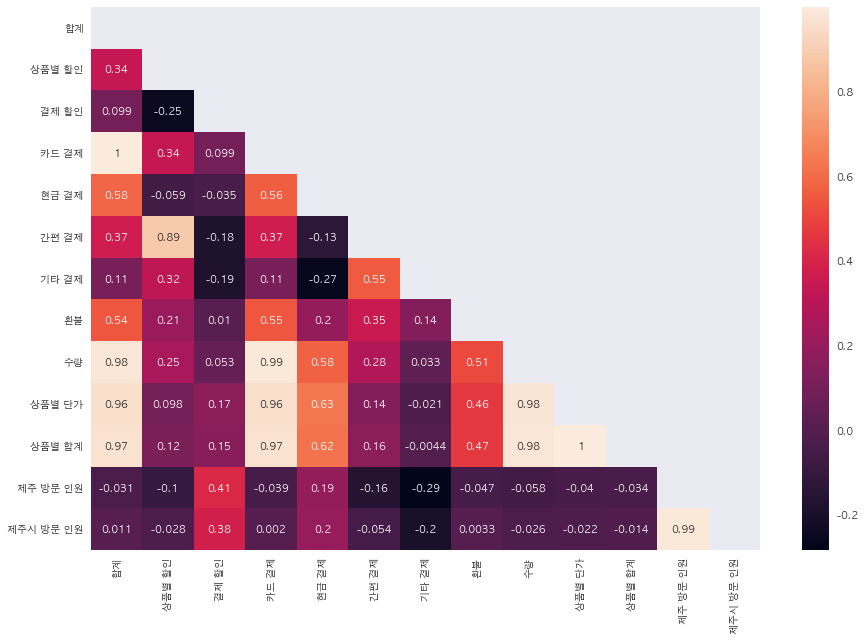

In [179]:
correlation = g.corr()
mask = np.triu(np.ones(correlation.shape))
plt.figure(figsize = (15,10))
sns.heatmap(correlation, mask = mask, annot= True)

<AxesSubplot:>

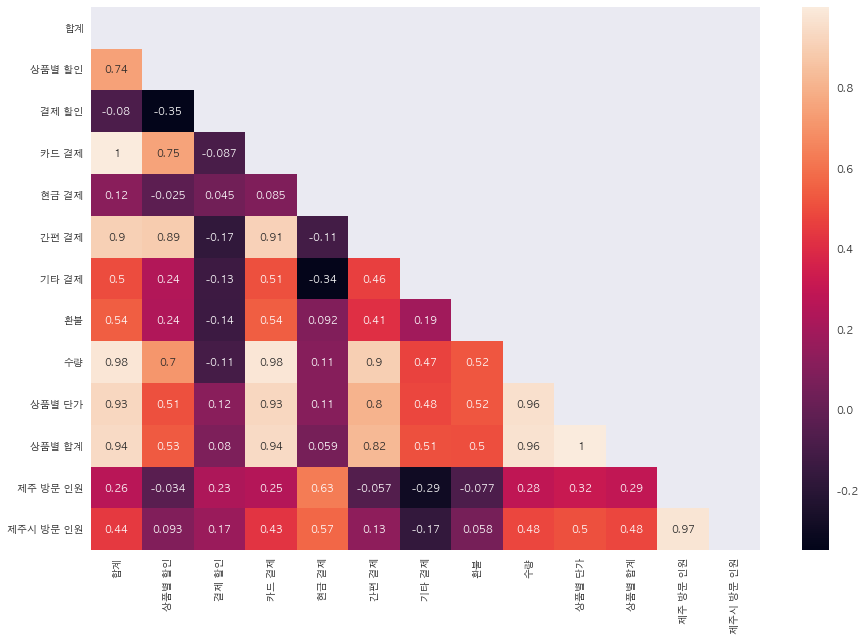

In [316]:
from sklearn.preprocessing import StandardScaler

sd_scaler = StandardScaler()

g = offline_df.groupby(["year_month"]).sum().reset_index()
jeju_population_1 = pd.read_csv("./data/제주특별자치도_방문자수.csv", encoding= "cp949")
jeju_population_2 = pd.read_csv("./data/제주특별자치도_제주시_방문자수.csv", encoding= "cp949")

jeju_population_1 = jeju_population_1.rename(columns={"방문자 수":"제주 방문 인원"})
jeju_population_2 = jeju_population_2.rename(columns={"방문자 수":"제주시 방문 인원"})
g = pd.concat([g,jeju_population_1["제주 방문 인원"][1:].reset_index(drop = True)], axis = 1)
g = pd.concat([g,jeju_population_2["제주시 방문 인원"][1:].reset_index(drop = True)], axis = 1)
g = g.drop(["year","month","day","hour"], axis = 1)

g.iloc[7:, 1:] = sd_scaler.fit_transform(g.iloc[7:, 1:])

correlation = g.iloc[7:, 1:].corr()
mask = np.triu(np.ones(correlation.shape))
plt.figure(figsize = (15,10))
sns.heatmap(correlation, mask = mask, annot= True)

